In [1]:
import pandas as pd
import numpy as np
import random #para generar numeros aleatorios
import matplotlib.pyplot as plt # generar grapifos

In [15]:
data = pd.read_csv('Indicators.csv')

In [16]:
data.shape

(5656458, 6)

In [21]:
filter = data['CountryName'] == 'Colombia'
data[filter].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7264,Colombia,COL,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.279940e+02
7265,Colombia,COL,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,9.846913e+01
7266,Colombia,COL,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.296202e+00
7267,Colombia,COL,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,9.217292e+01
7268,Colombia,COL,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.000000e+06


In [22]:
# contar los paises en la base de datos
countries = data['CountryName'].unique().tolist()
print("Paises en la base de datos de indicadores : ",len(countries))

Paises en la base de datos de indicadores :  247


In [24]:
print(countries)

['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)', 'Euro area', 'Europe & Central Asia (all income levels)', 'Europe & Central Asia (developing only)', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 'High income: nonOECD', 'High income: OECD', 'Latin America & Caribbean (all income levels)', 'Latin America & Caribbean (developing only)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa (all income levels)', 'Middle East & North Africa (developing only)', 'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states', 'Small states', 'South Asia', 'Sub-Saharan Africa (all income levels)', 'Sub-Saharan Africa (developing only)', 'Upper middle income', 'World', 'Afghanistan', 'Albania', '

In [26]:
# contar los paises en la base de datos
countriescode = data['CountryCode'].unique().tolist()
print("Codigo de Paises en la base de datos de indicadores : ",len(countriescode))

Codigo de Paises en la base de datos de indicadores :  247


In [27]:
print(countriescode)

['ARB', 'CSS', 'CEB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'FCS', 'HPC', 'HIC', 'NOC', 'OEC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'SST', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'ADO', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'ZAR', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMY', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KSV', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR'

In [28]:
years = data['Year'].unique().tolist()
print(years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [29]:
print("Año inicial : ", min(years), ", Año maximo :", max(years))

Año inicial :  1960 , Año maximo : 2015


In [40]:
#buscar las emiciones de Co2 = CO2 emissions (metrict tons per capita)
hist_indicador = 'Agricultural raw materials export'
hist_country = 'MEX'
#hist_year = 2007
mask1 = data['IndicatorName'].str.contains(hist_indicador) # indicadores CO2
mask2 = data['CountryCode'].str.contains(hist_country)# Mexico
#mask3 = data['Year'].isin([hist_year])# año
total_agricultural = data[mask1 & mask2]
total_agricultural.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4959347,Mexico,MEX,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2010,0.361169
5139396,Mexico,MEX,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2011,0.380307
5314973,Mexico,MEX,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2012,0.388599
5477946,Mexico,MEX,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2013,0.355708
5602861,Mexico,MEX,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2014,0.327914


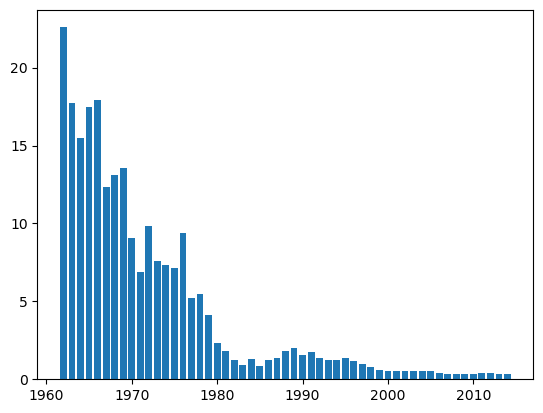

In [41]:
years = total_agricultural['Year']
agricultural = total_agricultural['Value']
# dibujar el plot < grafico https://matplotlib.org/stable/gallery/index.html
plt.bar(years, agricultural)
plt.show()

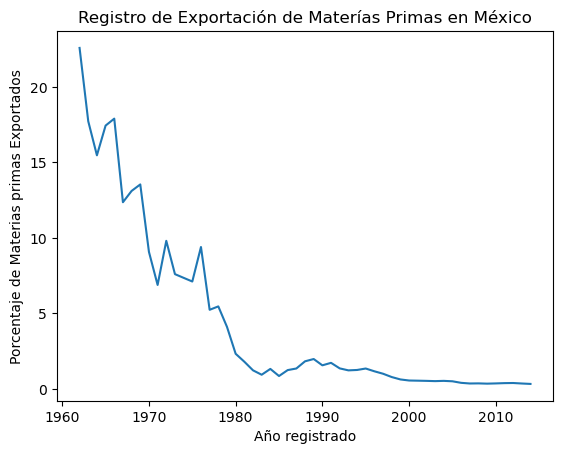

In [45]:
plt.plot(years,agricultural)
# empezamos a mostrar etiquetas
plt.ylabel('Porcentaje de Materias primas Exportados')
plt.xlabel('Año registrado')
plt.title('Registro de Exportación de Materías Primas en México')
plt.show() # indicamos que se imprima el grafico

In [43]:
# selecionamos el PIB de Mexico
hist_indicador= 'Food imports'
mask1 = data['IndicatorName'].str.contains(hist_indicador)
hist_country = 'MEX'
mask2 = data['CountryCode'].str.contains(hist_country)
gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
68504,Mexico,MEX,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,1962,6.428739
97068,Mexico,MEX,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,1963,7.948274
125979,Mexico,MEX,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,1964,5.357335
157035,Mexico,MEX,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,1965,5.216888
188665,Mexico,MEX,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,1966,4.695798


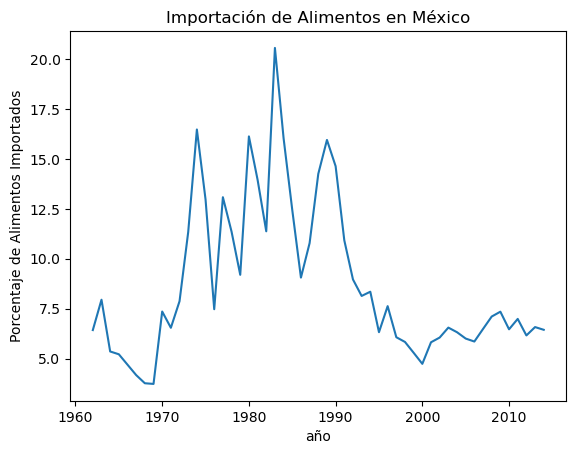

In [46]:
plt.plot(gdp_stage['Year'], gdp_stage['Value'])
plt.title('Importación de Alimentos en México')
plt.xlabel('año')
plt.ylabel('Porcentaje de Alimentos Importados')
plt.show() # indicamos que se imprima el grafico

In [57]:
print("Importación Alimentos año minimo :", gdp_stage['Year'].min(), ", Importación Alimentos año Maximo :",gdp_stage['Year'].max())
print("Exportación Primas año minimo :", total_agricultural['Year'].min(), ", Exportación Primas año Maximo :",total_agricultural['Year'].max())

Importación Alimentos año minimo : 1962 , Importación Alimentos año Maximo : 2014
Exportación Primas año minimo : 1962 , Exportación Primas año Maximo : 2014


In [55]:
gpd_stage_new = gdp_stage[gdp_stage['Year']<2015]
print(len(gpd_stage_new))
print(len(total_agricultural))

53
53


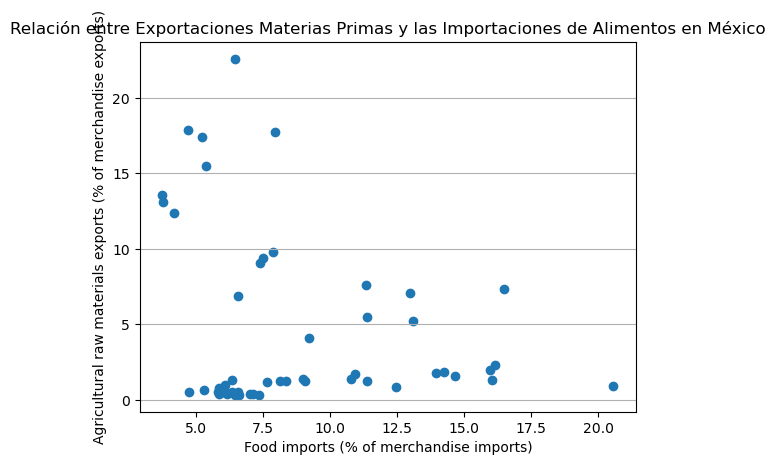

In [58]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Relación entre Exportaciones Materias Primas y las Importaciones de Alimentos en México')
axis.set_xlabel(gpd_stage_new['IndicatorName'].iloc[0], fontsize = 10)
axis.set_ylabel(total_agricultural['IndicatorName'].iloc[0], fontsize = 10)
X = gpd_stage_new['Value']
Y = total_agricultural['Value']
axis.scatter(X,Y)
plt.show()